## Risk Stratification - Case Study

The objective of the project is identify high-risk diabetic patients through risk stratification.
 - The total project is done in below steps:
      
       1.Data Preparation
       2.EDA
       3.Feature Engineering
       4.Train Test Split
       5.Feature Scaling
       6.Model Building and Evaluation
       7.Final Model Selection
       8.Final Outcome

In [572]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [573]:
#read the data.Please change the below location of the filepath for desired result
df = pd.read_csv(r'C:\Users\91973\Desktop\Data_Science\Course_5_Healthcare_analytics\Assignment_Risk Stratification\diabetic_data.csv')

### 1. Data preparation

#### 1.1 Basic Check

In [574]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [576]:
df.shape

(101766, 50)

In [577]:
#Remove duplicate column
df =  df.loc[:,~df.columns.duplicated()]

In [578]:
df.shape

(101766, 50)

Since there is no duplicate column present, number of columns are same

In [579]:
df.drop_duplicates()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [580]:
df.shape

(101766, 50)

Since there is no duplicate rows present, number of rows are same

check if there is any column with only on unique value 

In [581]:
for i in df.columns:
    if len(df[i].value_counts())==1:
        print(i)

examide
citoglipton


There are two features where there is only one value present. We can look into them later

#### 1.2 Missing Value treatment

In [582]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

There is no direct missing value present. Now, there are lot of '?' present in the dataset which is actually missing value. 
Hence, let us check the value of '?'

In [583]:
Missing_value = pd.DataFrame(df.isin(['?']).sum(axis=0)).reset_index()

In [584]:
Missing_value.rename(columns={'index':'Column_Name',0:'Missing_count'},inplace = True)

In [585]:
Missing_value['prcentage'] = Missing_value['Missing_count']*100/(df.shape[0])

In [586]:
Missing_value[Missing_value.sort_values('prcentage',axis=0,ascending=False).prcentage>0]

,Column_Name,Missing_count,prcentage
2,race,2273,2.233555
5,weight,98569,96.858479
10,payer_code,40256,39.557416
11,medical_specialty,49949,49.082208
18,diag_1,21,0.020636
19,diag_2,358,0.351787
20,diag_3,1423,1.398306


'diag_1','diag_2','diag_3' & 'race' these 4 columns has very less portion as missing value. Hence, we can remove those rows from the dataset

In [587]:
i = df[(df['diag_1'] == '?')| (df['diag_2'] == '?') | (df['diag_3'] == '?') ].index

In [588]:
df.drop(i,inplace = True)

For race we can convert '?' into 'Other'

In [589]:
df['race']=df['race'].apply(lambda x: 'Other' if x=='?' else x)

In [590]:
df['race'].value_counts()

Caucasian          75079
AfricanAmerican    18881
Other               3675
Hispanic            1984
Asian                625
Name: race, dtype: int64

drop 'weight','payer_code' & 'medical_specialty' since they have a lot of missing values

In [591]:
df.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1,inplace = True)

Let us replace '?' to understand the missing values

In [592]:
df.replace('?',np.nan,inplace = True)

In [593]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

Now we do not have any missing value in the dataset

admission_type_id: There 8 distinct values starting from 1 to 8 are present in the dataset. This are numeric representation of the following types:
      
      1: Emergency 
      2: Urgent 
      3: Elective 
      4: Newborn
      5. Not Available
      6: Null
      7: Trauma Centre
      8: Not Mapped


discharge_disposition_id: Here also, we have 1 to 28 distinct values. Which are mentioned below:

    1	Discharged to home
    2	Discharged/transferred to another short term hospital
    3	Discharged/transferred to SNF
    4	Discharged/transferred to ICF
    5	Discharged/transferred to another type of inpatient care institution
    6	Discharged/transferred to home with home health service
    7	Left AMA
    8	Discharged/transferred to home under care of Home IV provider
    9	Admitted as an inpatient to this hospital
    10	Neonate discharged to another hospital for neonatal aftercare
    11	Expired
    12	Still patient or expected to return for outpatient services
    13	Hospice / home
    14	Hospice / medical facility
    15	Discharged/transferred within this institution to Medicare approved swing bed
    16	Discharged/transferred/referred another institution for outpatient services
    17	Discharged/transferred/referred to this institution for outpatient services
    18	NULL
    19	Expired at home. Medicaid only, hospice.
    20	Expired in a medical facility. Medicaid only, hospice.
    22	Discharged/transferred to another rehab fac including rehab units of a hospital .
    23	Discharged/transferred to a long term care hospital.
    24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
    25	Not Mapped
    27	Discharged/transferred to a federal health care facility.
    28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital


From the above desciptions, we can find that 11,13,14,19,20 are either expired or Hospice. These rows we need to remove from the dataset as they cant be readmitted

In [594]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20])]

In [595]:
df.shape

(97825, 47)

admission_source_id: Meaning of these ids are:

    1	 Physician Referral
    2	 Clinic Referral
    3	 HMO Referral
    4	 Transfer from a hospital
    5	 Transfer from a Skilled Nursing Facility (SNF)
    6	 Transfer from another health care facility
    7	 Emergency Room
    8	 Court/Law Enforcement
    9	 Not Available
    10	 Transfer from critial access hospital
    11	 Normal Delivery
    13	 Sick Baby
    14	 Extramural Birth
    17	 NULL
    20	 Not Mapped
    22	 Transfer from hospital inpt/same fac reslt in a sep claim
    25	 Transfer from Ambulatory Surgery Center
    


diag_1,diag_2 & diag_3 are Primary,Secondary and Additional Secondary type of diagonosis. Meaning of the numbers here are mentioned below:

    Diabetes       : 250.xx
    circulatory    : 390–459 & 785
    Respiratory    : 460–519 & 786
    Digestive      : 520–579 & 787
    Genitourinary  : 580–629 & 788
    Injury         : 800–999
    Musculoskeletal: 710–739
    Neoplasms      : 140–239 
    Other - Other symptoms, signs, and ill-defined conditions: 780, 781, 784, 790–799
    Other - Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes :240–279, without 250
    Other - Diseases of the skin and subcutaneous tissue : 680–709, 782
    Other - Infectious and parasitic diseases : 001–139
    Other - Mental disorders : 290–319
    Other - External causes of injury and supplemental classification : E–V
    Other - Diseases of the blood and blood-forming organs: 280–289
    Other - Diseases of the nervous system : 320–359
    Other - Complications of pregnancy, childbirth, and the puerperium : 630–679
    Other - Diseases of the sense organs : 360–389
    Other - Congenital anomalies : 740–759
    Other - Other symptoms involving abdomen and pelvis : 789
    Other - Symptoms concerning nutrition metabolism and development : 783
    
Hence, we group the data and get below categories:
   
    Diabetes,
    circulatory,
    Respiratory,
    Digestive,
    Genitourinary,
    Injury,
    Musculoskeletal,
    Neoplasms & 
    Other

In [596]:
# First take a copy of the dataset
df1 = df.copy()

In [597]:
# First separate E to V series and make the column numeric
df_diag_1_num = df1[~df1.diag_1.str.startswith(('V','E'),na=False)] 

In [598]:
# convert diag_1 column to numeric
df_diag_1_num['diag_1'] = pd.to_numeric(df_diag_1_num['diag_1'])

In [599]:
a = list(df_diag_1_num.diag_1)

In [600]:
b =[]
for i in range(len(a)):
    if a[i]>=250.00 and a[i]<251.00:
        b.append('Diabetes')
    elif a[i]>=390.00 and a[i]<=459.00 or a[i]==785.00:
        b.append('circulatory')
    elif a[i]>=460.00 and a[i]<=519.00 or a[i]==786.00:
        b.append('Respiratory')
    elif a[i]>=520.00 and a[i]<=579.00 or a[i]==787.00:
        b.append('Digestive')
    elif a[i]>=580.00 and a[i]<=629.00 or a[i]==788.00:
        b.append('Genitourinary')
    elif a[i]>=630.00 and a[i]<=679.00:
        b.append('Other')
    elif a[i]>=680.00 and a[i]<=709.00 or a[i]==782.00:
        b.append('Other')
    elif a[i]>=710.00 and a[i]<=739.00:
        b.append('Musculoskeletal')
    elif a[i]>=740.00 and a[i]<=759.00:
        b.append('Other')
    elif a[i]>=790.00 and a[i]<=799.00 or a[i]==780.00 or a[i]==781.00 or a[i]==784.00:
        b.append('Other')
    elif a[i]>=800.00 and a[i]<=999.00:
        b.append('Injury')
    elif a[i]>=001.00 and a[i]<=139.00:
        b.append('Other')
    elif a[i]>=140.00 and a[i]<=239.00:
        b.append('Neoplasms')
    elif a[i]>=240.00 and a[i]<=249.00:
        b.append('Other')
    elif a[i]>=251.00 and a[i]<=389.00 or a[i]==783.00 or a[i]==789.00:
        b.append('Other')
    else:
        b.append('NA')


In [601]:
df_diag_1_num['diag_1'] = b

In [602]:
df_diag_1_cat = df1[df1.diag_1.str.startswith(('V','E'),na=False)]

In [603]:
# convert E and V series into 'Other'
df_diag_1_cat.diag_1 = 'Other'

In [604]:
df1 = pd.concat([df_diag_1_num,df_diag_1_cat],axis=0)

Similarly we can change diag_2

In [605]:
df_diag_2_num = df1[~df1.diag_2.str.startswith(('V','E'),na=False)] 
# convert diag_2 column to numeric
df_diag_2_num['diag_2'] = pd.to_numeric(df_diag_2_num['diag_2'])

In [606]:
a = list(df_diag_2_num.diag_2)
b =[]
for i in range(len(a)):
    if a[i]>=250.00 and a[i]<251.00:
        b.append('Diabetes')
    elif a[i]>=390.00 and a[i]<=459.00 or a[i]==785.00:
        b.append('circulatory')
    elif a[i]>=460.00 and a[i]<=519.00 or a[i]==786.00:
        b.append('Respiratory')
    elif a[i]>=520.00 and a[i]<=579.00 or a[i]==787.00:
        b.append('Digestive')
    elif a[i]>=580.00 and a[i]<=629.00 or a[i]==788.00:
        b.append('Genitourinary')
    elif a[i]>=630.00 and a[i]<=679.00:
        b.append('Other')
    elif a[i]>=680.00 and a[i]<=709.00 or a[i]==782.00:
        b.append('Other')
    elif a[i]>=710.00 and a[i]<=739.00:
        b.append('Musculoskeletal')
    elif a[i]>=740.00 and a[i]<=759.00:
        b.append('Other')
    elif a[i]>=790.00 and a[i]<=799.00 or a[i]==780.00 or a[i]==781.00 or a[i]==784.00:
        b.append('Other')
    elif a[i]>=800.00 and a[i]<=999.00:
        b.append('Injury')
    elif a[i]>=001.00 and a[i]<=139.00:
        b.append('Other')
    elif a[i]>=140.00 and a[i]<=239.00:
        b.append('Neoplasms')
    elif a[i]>=240.00 and a[i]<=249.00:
        b.append('Other')
    elif a[i]>=251.00 and a[i]<=389.00 or a[i]==783.00 or a[i]==789.00:
        b.append('Other')
    else:
        b.append('NA')

df_diag_2_num['diag_2'] = b



In [607]:
df_diag_2_cat = df1[df1.diag_2.str.startswith(('V','E'),na=False)]
df_diag_2_cat.diag_2 = 'Other'
df1 = pd.concat([df_diag_2_num,df_diag_2_cat],axis=0)

Now we can change diag_3


In [608]:
df_diag_3_num = df1[~df1.diag_3.str.startswith(('V','E'),na=False)] 
# convert diag_3 column to numeric
df_diag_3_num['diag_3'] = pd.to_numeric(df_diag_3_num['diag_3'])

In [609]:
a = list(df_diag_3_num.diag_3)
b =[]
for i in range(len(a)):
    if a[i]>=250.00 and a[i]<251.00:
        b.append('Diabetes')
    elif a[i]>=390.00 and a[i]<=459.00 or a[i]==785.00:
        b.append('circulatory')
    elif a[i]>=460.00 and a[i]<=519.00 or a[i]==786.00:
        b.append('Respiratory')
    elif a[i]>=520.00 and a[i]<=579.00 or a[i]==787.00:
        b.append('Digestive')
    elif a[i]>=580.00 and a[i]<=629.00 or a[i]==788.00:
        b.append('Genitourinary')
    elif a[i]>=630.00 and a[i]<=679.00:
        b.append('Other')
    elif a[i]>=680.00 and a[i]<=709.00 or a[i]==782.00:
        b.append('Other')
    elif a[i]>=710.00 and a[i]<=739.00:
        b.append('Musculoskeletal')
    elif a[i]>=740.00 and a[i]<=759.00:
        b.append('Other')
    elif a[i]>=790.00 and a[i]<=799.00 or a[i]==780.00 or a[i]==781.00 or a[i]==784.00:
        b.append('Other')
    elif a[i]>=800.00 and a[i]<=999.00:
        b.append('Injury')
    elif a[i]>=001.00 and a[i]<=139.00:
        b.append('Other')
    elif a[i]>=140.00 and a[i]<=239.00:
        b.append('Neoplasms')
    elif a[i]>=240.00 and a[i]<=249.00:
        b.append('Other')
    elif a[i]>=251.00 and a[i]<=389.00 or a[i]==783.00 or a[i]==789.00:
        b.append('Other')
    else:
        b.append('NA')

df_diag_3_num['diag_3'] = b

In [610]:
df_diag_3_cat = df1[df1.diag_3.str.startswith(('V','E'),na=False)]
df_diag_3_cat.diag_3 = 'Other'
df1 = pd.concat([df_diag_3_num,df_diag_3_cat],axis=0)

In [611]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,Other,Diabetes,Other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Other,Diabetes,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,circulatory,circulatory,Diabetes,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,circulatory,Respiratory,Diabetes,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30


In [612]:
df1.shape

(97825, 47)

In [613]:
# change the readmitted column
df1['readmitted'] = df['readmitted'].map({'>30':1,'<30':1,'NO':0})

In [614]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,Other,Diabetes,Other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Other,Diabetes,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,circulatory,circulatory,Diabetes,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,1
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,circulatory,Respiratory,Diabetes,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1


#### Define Comorbidity

In [615]:
#[Comorbidity is the state of having multiple medical conditions at the same time]
a=[]

for i in df1.index:
    if (df1.diag_1[i] =='Diabetes' and df1.diag_2[i] !='circulatory' and df1.diag_3[i] !='circulatory') or (df1.diag_1[i] !='circulatory' and df1.diag_2[i] =='Diabetes' and df1.diag_3[i] !='circulatory') or (df1.diag_1[i] !='circulatory' and df1.diag_2[i] !='circulatory' and df1.diag_3[i] =='Diabetes'):
        a.append(1)
    elif (df1.diag_1[i] =='circulatory' and df1.diag_2[i] !='Diabetes' and df1.diag_3[i] !='Diabetes') or (df1.diag_1[i] !='Diabetes' and df1.diag_2[i] =='circulatory' and df1.diag_3[i] !='Diabetes') or (df1.diag_1[i] !='Diabetes' and df1.diag_2[i] !='Diabetes' and df1.diag_3[i] =='circulatory'):
        a.append(2)
    elif (df1.diag_1[i] =='circulatory' or df1.diag_1[i] =='Diabetes') and (df1.diag_2[i] =='circulatory' or df1.diag_2[i] =='Diabetes') and (df1.diag_3[i] =='circulatory' or df1.diag_3[i] =='Diabetes'):
        a.append(3)
    elif (df1.diag_1[i] !='circulatory' or df1.diag_1[i] !='Diabetes') and (df1.diag_2[i] !='circulatory' or df1.diag_2[i] !='Diabetes') and (df1.diag_3[i] !='circulatory' or df1.diag_3[i] !='Diabetes'):
        a.append(0)
    

In [616]:
df1['Comorbidity'] =a

## 2. EDA

#### Numeric fields

In [617]:
df1_all_numeric = df1[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']]
cor = df1_all_numeric.corr()

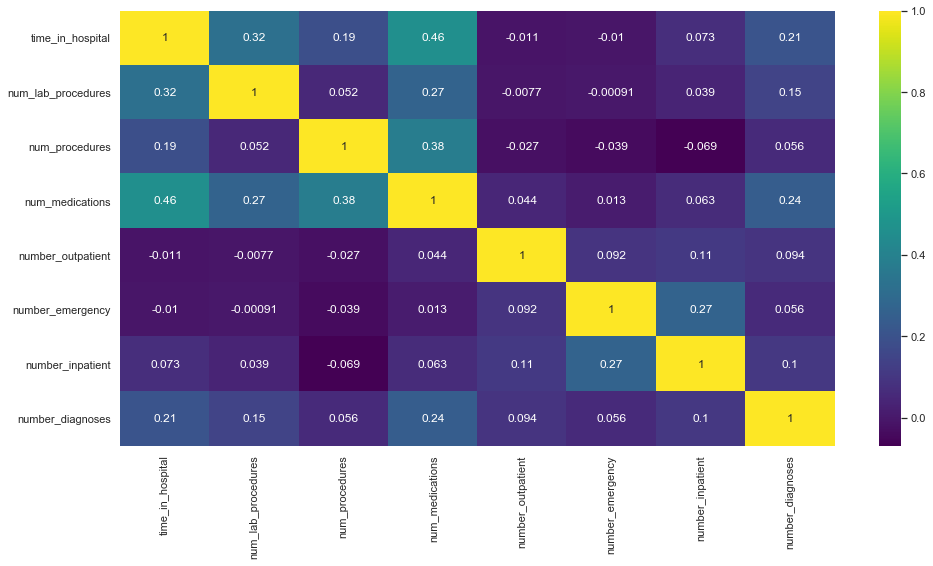

In [618]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="viridis", annot=True)
plt.show()

In [619]:
df1_all_numeric.describe(percentiles = [.05, .25, .5, .75, .95])

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000
mean,4.403905,42.983573,1.344942,16.076524,0.372512,0.199652,0.634879,7.477485
std,2.974635,19.627483,1.707993,8.083381,1.272075,0.940947,1.260289,1.846051
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
5%,1.000000,4.000000,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000
25%,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
95%,11.000000,73.000000,5.000000,31.000000,2.000000,1.000000,3.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


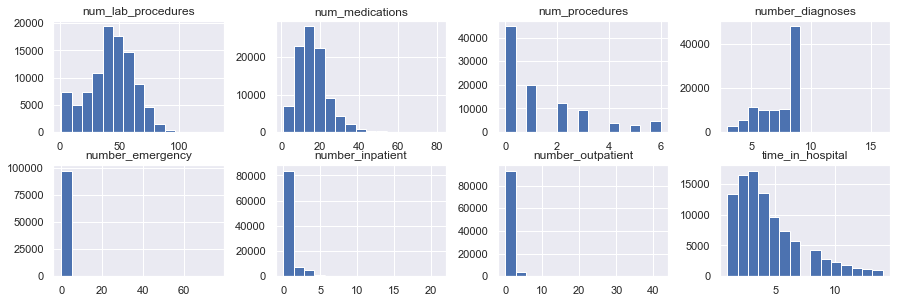

In [620]:
#Let us look into the distribution of numerical colum1s
sns.set(font_scale=1)
df1_all_numeric.hist(bins=15, figsize=(15,10), layout=(4, 4));

#### Categorical fields

Earlier, we have seen that, 'examide','citoglipton' has only one value. Hence we can drop this two features from the dataset

In [621]:
df1.drop(['examide','citoglipton'],axis = 1,inplace = True)

In [622]:
df1.shape

(97825, 46)

In [623]:
# Get all the categorical features
cat = ['race', 'gender','age','admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diag_2','diag_3',
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide',
       'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']


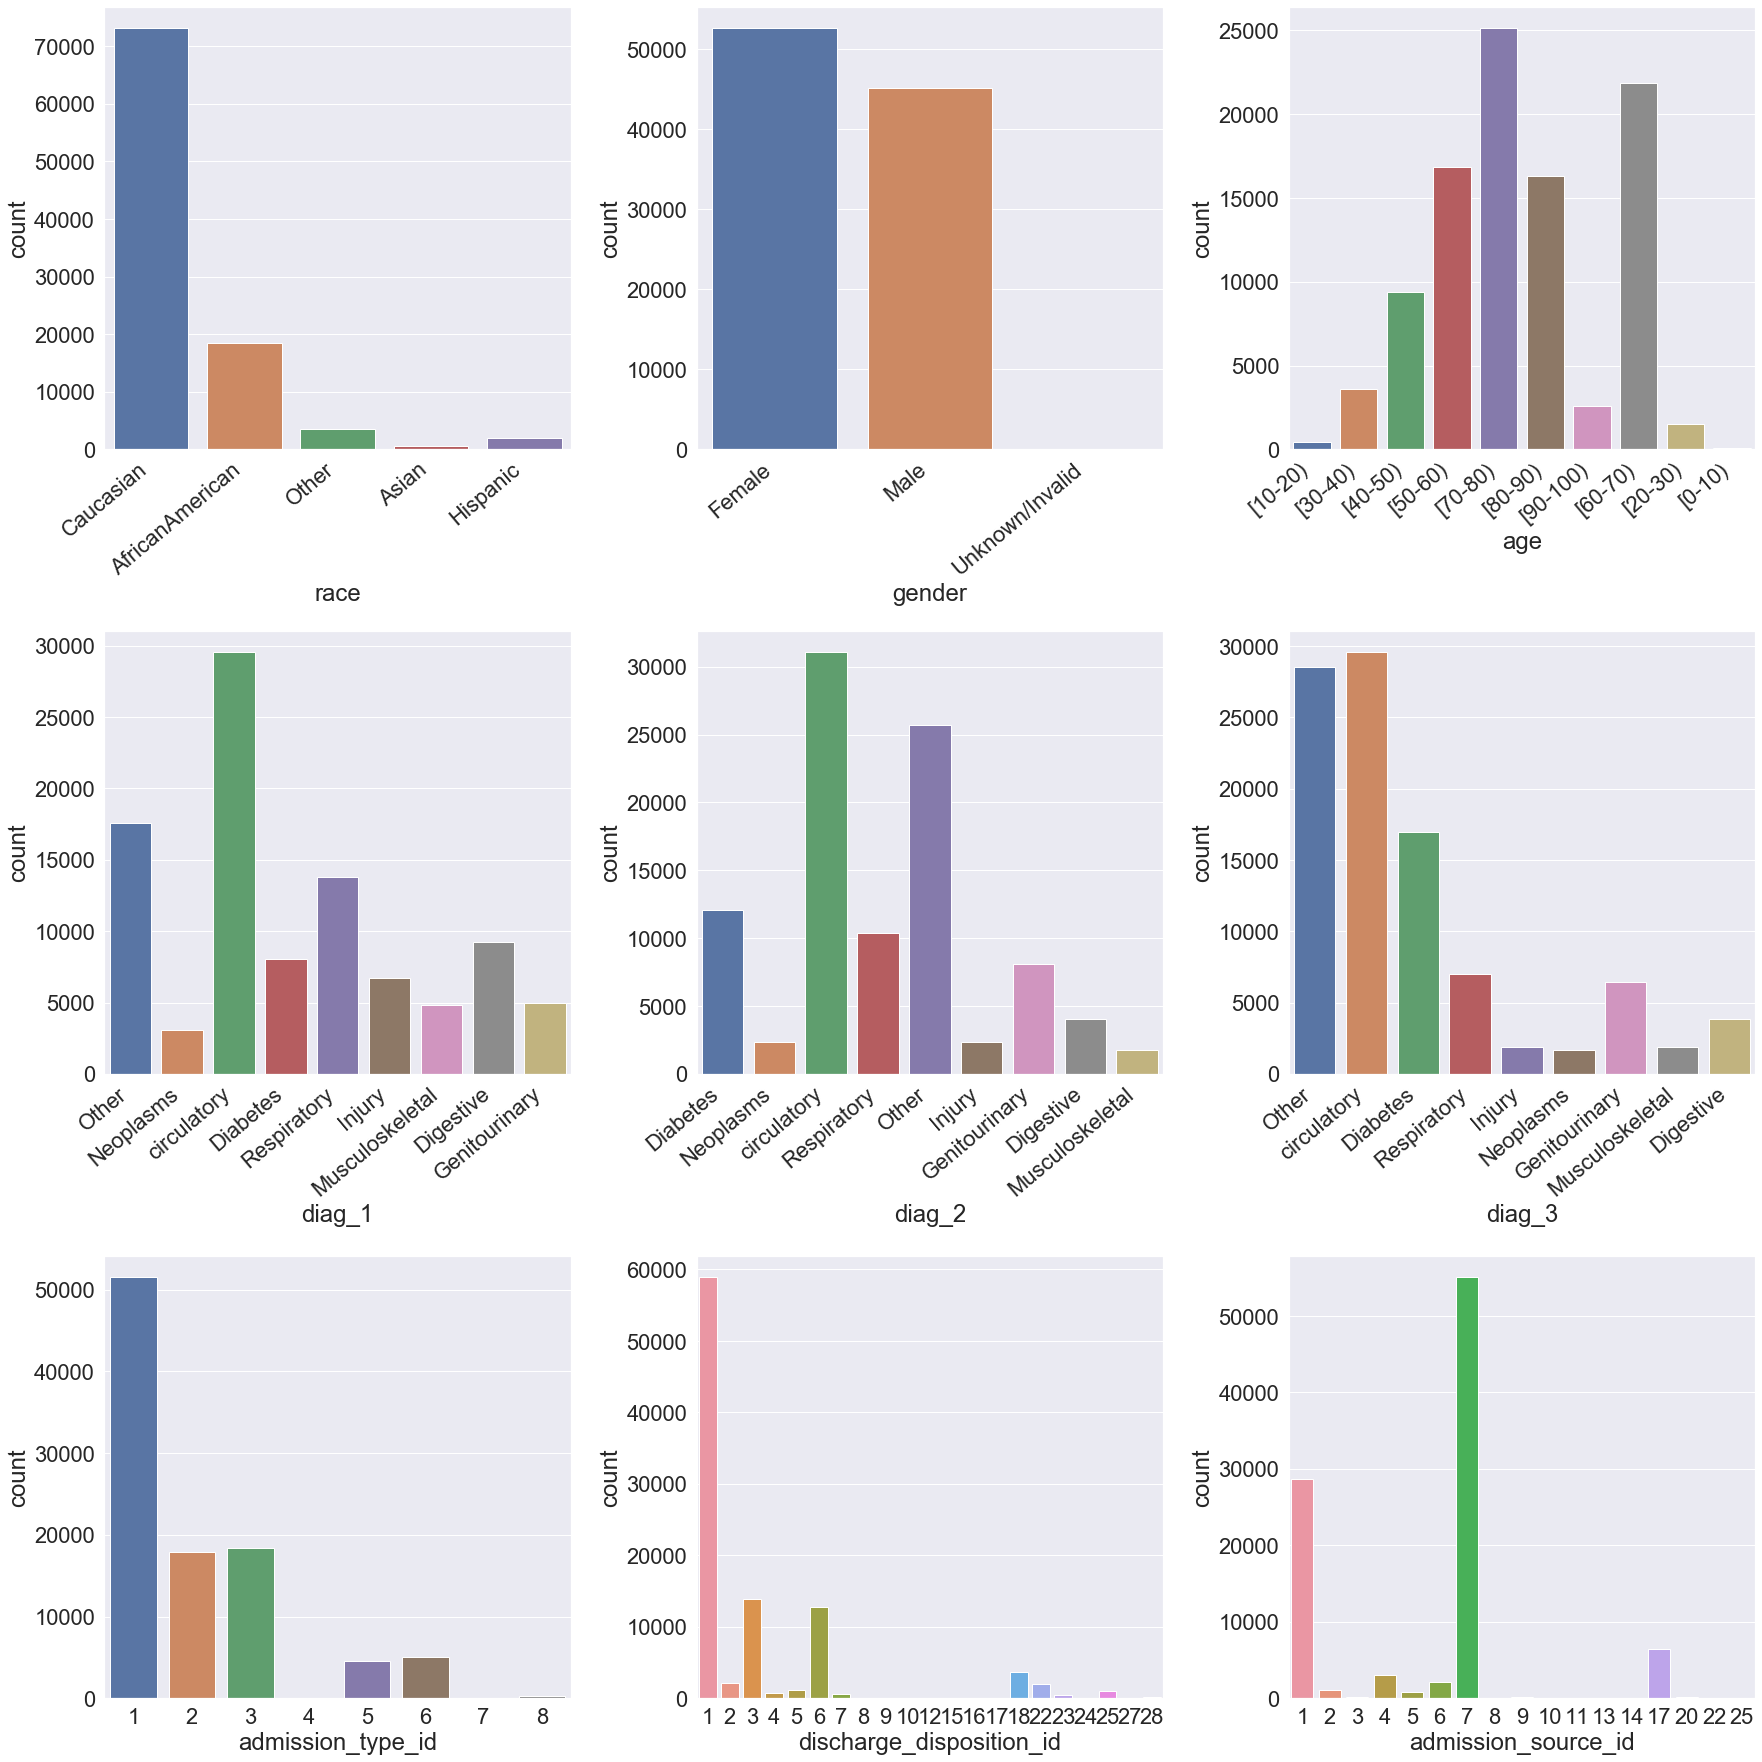

In [624]:
#Let us look into the distribution of categorical columns
sns.set(font_scale=2)
plt.figure(figsize=(25,25))
plt.subplot(3,3,1)
a = sns.countplot(df1['race'])
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.subplot(3,3,2)
a = sns.countplot(df1['gender'])
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.subplot(3,3,3)
a=sns.countplot(df1['age'])
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.subplot(3,3,4)
a=sns.countplot(df1['diag_1'])
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.subplot(3,3,5)
a=sns.countplot(df1['diag_2'])
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.subplot(3,3,6)
a=sns.countplot(df1['diag_3'])
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.subplot(3,3,7)
sns.countplot(df1['admission_type_id'])
plt.subplot(3,3,8)
sns.countplot(df1['discharge_disposition_id'])
plt.subplot(3,3,9)
sns.countplot(df1['admission_source_id'])


plt.tight_layout()
plt.show()

### 3. Feature Engineering

Now, we need to convert the categorical features into numeric for the modelling purpose. From the above set of categorical features, we can say that age bucket is an ordinal categorical variable and rest are nominal categorical variables. So their conversion process would be different from each other

In [625]:
df1['age'] = df1['age'].map({'[0-10)':0,'[10-20)':1,'[20-30)':2,'[30-40)':3,'[40-50)':4,'[50-60)':5,'[60-70)':6,'[70-80)':7,'[80-90)':8,'[90-100)':9})

For rest of the features, let us use one hot encoding technique

In [626]:
cat = ['race', 'gender','admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diag_2','diag_3',
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide',
       'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

df1 = pd.get_dummies(df1,columns=cat,drop_first=True)

In [627]:
df1.shape

(97825, 142)

In [628]:
# Let us drop encounter_id and patient_nbr from the dataset
#df1.drop(['encounter_id','patient_nbr'],axis=1,inplace = True)

In [629]:
df1.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Comorbidity,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_1_circulatory,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_2_circulatory,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,diag_3_circulatory,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
1,149190,55629189,1,3,59,0,18,0,0,0,9,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,500364,82442376,3,2,44,1,16,0,0,0,7,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
4,16680,42519267,4,1,51,0,8,0,0,0,5,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5,35754,82637451,5,3,31,6,16,0,0,0,9,1,3,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1
7,63768,114882984,7,5,73,0,12,0,0,0,8,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

Note: We have already created a new feature named Comorbidity

### 4.Train - Test Split

Now Let's start model building by spliting the data into test and train section

In [630]:
from sklearn.model_selection import train_test_split

In [631]:
# Store independant variables to X 
X = df1.drop(['readmitted'], axis = 1)
# Store dependant variable to y
y = df1['readmitted']

In [632]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (68477, 141)
X_test: (29348, 141)
y_train: (68477,)
y_test: (29348,)


In [633]:
# Remove Id columns from X_train
X_train.drop(['encounter_id','patient_nbr'],axis=1,inplace = True)

### 5.Feature Scaling

In [634]:
from sklearn.preprocessing import StandardScaler

In [635]:
scaler = StandardScaler()
X_train[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']] = scaler.fit_transform(X_train[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']])
X_train.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Comorbidity,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_1_circulatory,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_2_circulatory,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,diag_3_circulatory,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
55071,6,0.200042,1.176684,-0.785873,0.364724,-0.296806,-0.207674,-0.505452,0.823272,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1
570,8,0.872746,-0.304762,-0.199073,1.603576,-0.296806,-0.207674,1.078687,0.281963,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
48893,6,-0.136310,-1.275364,0.974527,-0.626356,-0.296806,-0.207674,-0.505452,0.823272,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
23909,6,-0.472662,-0.355846,-0.199073,-0.130816,-0.296806,-0.207674,-0.505452,0.823272,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,

### 6.Model Building and Evaluation

#### 6.1 Logistic Regression

Since the number of features are too high. Let us consider a small set of significant features by using RFE technique

In [636]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [637]:
# Import RFE and select 20 variables
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [638]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 85),
 ('time_in_hospital', False, 76),
 ('num_lab_procedures', False, 99),
 ('num_procedures', False, 77),
 ('num_medications', False, 117),
 ('number_outpatient', False, 48),
 ('number_emergency', False, 21),
 ('number_inpatient', True, 1),
 ('number_diagnoses', False, 32),
 ('Comorbidity', False, 95),
 ('race_Asian', False, 4),
 ('race_Caucasian', False, 78),
 ('race_Hispanic', False, 11),
 ('race_Other', False, 9),
 ('gender_Male', False, 67),
 ('gender_Unknown/Invalid', False, 39),
 ('admission_type_id_2', False, 50),
 ('admission_type_id_3', False, 86),
 ('admission_type_id_4', False, 114),
 ('admission_type_id_5', False, 29),
 ('admission_type_id_6', False, 10),
 ('admission_type_id_7', True, 1),
 ('admission_type_id_8', False, 33),
 ('discharge_disposition_id_2', False, 53),
 ('discharge_disposition_id_3', False, 87),
 ('discharge_disposition_id_4', False, 111),
 ('discharge_disposition_id_5', False, 18),
 ('discharge_disposition_id_6', False, 16),
 ('discharge_d

In [639]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [640]:
col

Index(['number_inpatient', 'admission_type_id_7',
       'discharge_disposition_id_15', 'discharge_disposition_id_17',
       'discharge_disposition_id_23', 'discharge_disposition_id_28',
       'admission_source_id_4', 'admission_source_id_6',
       'admission_source_id_9', 'admission_source_id_10',
       'admission_source_id_11', 'admission_source_id_20',
       'admission_source_id_22', 'admission_source_id_25', 'repaglinide_Up',
       'chlorpropamide_Up', 'acarbose_No', 'glyburide-metformin_Up',
       'glipizide-metformin_Steady', 'metformin-rosiglitazone_Steady'],
      dtype='object')

In [641]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [642]:
X_train.shape

(68477, 20)

In [643]:
# Import statsmodels
import statsmodels.api as sm

In [644]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68456
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45157.
Date:                Mon, 29 Jun 2020   Deviance:                       90314.
Time:                        19:30:27   Pearson chi2:                 7.21e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

There are quite a few variable which have a p-value greater than 0.05. Let us look into VIFs before taking care of those

In [645]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [646]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,acarbose_No,1.07
6,admission_source_id_4,1.03
7,admission_source_id_6,1.02
0,number_inpatient,1.00
11,admission_source_id_20,1.00
18,glipizide-metformin_Steady,1.00
17,glyburide-metformin_Up,1.00
15,chlorpropamide_Up,1.00
14,repaglinide_Up,1.00
13,admission_source_id_25,1.00


In [647]:
X_train.drop('admission_type_id_7', axis = 1, inplace = True)

In [648]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68457
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45161.
Date:                Mon, 29 Jun 2020   Deviance:                       90323.
Time:                        19:30:35   Pearson chi2:                 7.21e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [649]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
11,admission_source_id_22,1.00
17,glipizide-metformin_Steady,1.00
16,glyburide-metformin_Up,1.00
14,chlorpropamide_Up,1.00
13,repaglinide_Up,1.00
12,admission_source_id_25,1.00


In [650]:
X_train.drop('admission_source_id_11', axis = 1, inplace = True)

In [651]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68458
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45163.
Date:                Mon, 29 Jun 2020   Deviance:                       90326.
Time:                        19:30:43   Pearson chi2:                 7.21e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [652]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
10,admission_source_id_22,1.00
16,glipizide-metformin_Steady,1.00
15,glyburide-metformin_Up,1.00
13,chlorpropamide_Up,1.00
12,repaglinide_Up,1.00
11,admission_source_id_25,1.00


In [653]:
X_train.drop('admission_source_id_25', axis = 1, inplace = True)

In [654]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68459
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45164.
Date:                Mon, 29 Jun 2020   Deviance:                       90328.
Time:                        19:30:51   Pearson chi2:                 7.21e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [655]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
10,admission_source_id_22,1.00
15,glipizide-metformin_Steady,1.00
14,glyburide-metformin_Up,1.00
12,chlorpropamide_Up,1.00
11,repaglinide_Up,1.00
8,admission_source_id_10,1.00


In [656]:
X_train.drop('chlorpropamide_Up', axis = 1, inplace = True)

In [657]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68460
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45168.
Date:                Mon, 29 Jun 2020   Deviance:                       90335.
Time:                        19:30:56   Pearson chi2:                 7.21e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [658]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
1,discharge_disposition_id_15,1.00
2,discharge_disposition_id_17,1.00
3,discharge_disposition_id_23,1.00
4,discharge_disposition_id_28,1.00
7,admission_source_id_9,1.00
8,admission_source_id_10,1.00


In [659]:
X_train.drop('metformin-rosiglitazone_Steady', axis = 1, inplace = True)

In [660]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68461
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45169.
Date:                Mon, 29 Jun 2020   Deviance:                       90338.
Time:                        19:31:00   Pearson chi2:                 7.21e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [661]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
1,discharge_disposition_id_15,1.00
2,discharge_disposition_id_17,1.00
3,discharge_disposition_id_23,1.00
4,discharge_disposition_id_28,1.00
7,admission_source_id_9,1.00
8,admission_source_id_10,1.00


In [662]:
X_train.drop('admission_source_id_22', axis = 1, inplace = True)

In [663]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68462
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45169.
Date:                Mon, 29 Jun 2020   Deviance:                       90339.
Time:                        19:31:05   Pearson chi2:                 7.21e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [664]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
1,discharge_disposition_id_15,1.00
2,discharge_disposition_id_17,1.00
3,discharge_disposition_id_23,1.00
4,discharge_disposition_id_28,1.00
7,admission_source_id_9,1.00
8,admission_source_id_10,1.00


In [665]:
X_train.drop('glipizide-metformin_Steady', axis = 1, inplace = True)

In [666]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68463
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45170.
Date:                Mon, 29 Jun 2020   Deviance:                       90340.
Time:                        19:31:08   Pearson chi2:                 7.21e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [667]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
1,discharge_disposition_id_15,1.00
2,discharge_disposition_id_17,1.00
3,discharge_disposition_id_23,1.00
4,discharge_disposition_id_28,1.00
7,admission_source_id_9,1.00
8,admission_source_id_10,1.00


In [668]:
X_train.drop('glyburide-metformin_Up', axis = 1, inplace = True)

In [669]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68464
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45171.
Date:                Mon, 29 Jun 2020   Deviance:                       90342.
Time:                        19:31:11   Pearson chi2:                 7.21e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [670]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
1,discharge_disposition_id_15,1.00
2,discharge_disposition_id_17,1.00
3,discharge_disposition_id_23,1.00
4,discharge_disposition_id_28,1.00
7,admission_source_id_9,1.00
8,admission_source_id_10,1.00


In [671]:
X_train.drop('admission_source_id_10', axis = 1, inplace = True)

In [672]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68465
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45172.
Date:                Mon, 29 Jun 2020   Deviance:                       90343.
Time:                        19:31:13   Pearson chi2:                 7.21e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [673]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,acarbose_No,1.07
5,admission_source_id_4,1.03
6,admission_source_id_6,1.02
0,number_inpatient,1.00
1,discharge_disposition_id_15,1.00
2,discharge_disposition_id_17,1.00
3,discharge_disposition_id_23,1.00
4,discharge_disposition_id_28,1.00
7,admission_source_id_9,1.00
8,admission_source_id_20,1.00


In [674]:
X_train.drop('discharge_disposition_id_17', axis = 1, inplace = True)

In [675]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68466
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45173.
Date:                Mon, 29 Jun 2020   Deviance:                       90346.
Time:                        19:31:15   Pearson chi2:                 7.21e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [676]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,acarbose_No,1.07
4,admission_source_id_4,1.03
5,admission_source_id_6,1.02
0,number_inpatient,1.00
1,discharge_disposition_id_15,1.00
2,discharge_disposition_id_23,1.00
3,discharge_disposition_id_28,1.00
6,admission_source_id_9,1.00
7,admission_source_id_20,1.00
8,repaglinide_Up,1.00


In [677]:
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             readmitted   No. Observations:                68477
Model:                            GLM   Df Residuals:                    68466
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45173.
Date:                Mon, 29 Jun 2020   Deviance:                       90346.
Time:                        19:31:17   Pearson chi2:                 7.21e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [678]:
y_train_pred = res.predict(sm.add_constant(X_train))

In [679]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)

In [680]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Readmitted':y_train.values, 'Readmission_Prob':y_train_pred})
y_train_pred_final.head()

,Readmitted,Readmission_Prob
0,1,0.416012
1,1,0.641584
2,1,0.416012
3,0,0.416012
4,0,0.416012


In [681]:
y_train_pred_final['Predicted'] = y_train_pred_final.Readmission_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Readmitted,Readmission_Prob,Predicted
0,1,0.416012,0
1,1,0.641584,1
2,1,0.416012,0
3,0,0.416012,0
4,0,0.416012,0


In [682]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [683]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final.Predicted )
print(confusion)

[[27896  8105]
 [18155 14321]]


In [684]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.Predicted))

0.6165135739007258


In [685]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

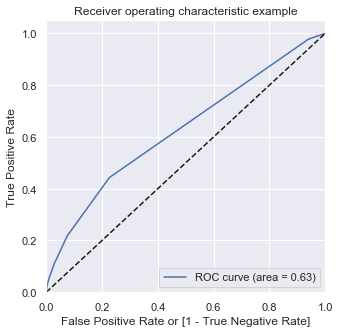

In [686]:
# Call the ROC function
sns.set(font_scale=1)
draw_roc(y_train_pred_final.Readmitted, y_train_pred_final.Readmission_Prob)

In [687]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [688]:
# Calculate the sensitivity
TP/(TP+FN)

0.4409717945559798

In [689]:
# Calculate the specificity
TN/(TN+FP)

0.7748673647954224

In [690]:
# Calculate the false postive rate 
print(FP/ float(TN+FP))

0.22513263520457766


In [691]:
# positive predictive value 
print (TP / float(TP+FP))

0.6385891376081334


In [692]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6057631756096502


In [693]:
#Precision
print (TP / float(TP+ FP))

0.6385891376081334


In [694]:
#Recall
print (TP / float(TP+ FN))

0.4409717945559798


In [695]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Readmission_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Readmitted,Readmission_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.416012,0,1,1,1,1,1,0,0,0,0,0
1,1,0.641584,1,1,1,1,1,1,1,1,0,0,0
2,1,0.416012,0,1,1,1,1,1,0,0,0,0,0
3,0,0.416012,0,1,1,1,1,1,0,0,0,0,0
4,0,0.416012,0,1,1,1,1,1,0,0,0,0,0


In [696]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.474261  1.000000  0.000000
0.1   0.1  0.474261  1.000000  0.000000
0.2   0.2  0.474860  0.999661  0.001444
0.3   0.3  0.493991  0.979523  0.055998
0.4   0.4  0.497057  0.969516  0.070859
0.5   0.5  0.616514  0.440972  0.774867
0.6   0.6  0.588855  0.215667  0.925502
0.7   0.7  0.563488  0.112822  0.970029
0.8   0.8  0.548272  0.061276  0.987584
0.9   0.9  0.534778  0.022355  0.997028


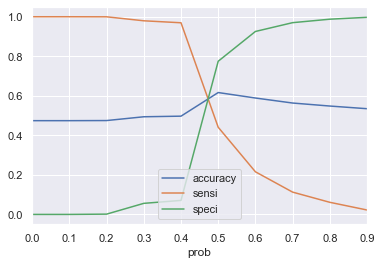

In [697]:
# Let's plot it as well
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 let's choose 0.48 as our cutoff now.

In [698]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Readmission_Prob.map( lambda x: 1 if x > 0.48 else 0)
y_train_pred_final.head(10)

,Readmitted,Readmission_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.416012,0,1,1,1,1,1,0,0,0,0,0,0
1,1,0.641584,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.416012,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.416012,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.416012,0,1,1,1,1,1,0,0,0,0,0,0
5,1,0.416012,0,1,1,1,1,1,0,0,0,0,0,0
6,1,0.677295,1,1,1,1,1,1,1,1,0,0,0,1
7,1,0.416012,0,1,1,1,1,1,0,0,0,0,0,0
8,1,0.641584,1,1,1,1,1,1,1,1,0,0,0,1
9,0,0.530348,1,1,1,1,1,1,1,0,0,0,0,1


In [699]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.final_predicted)

0.6166742117791375

Making Predictions on the Test Set

In [700]:
# Scale the test set as well using just 'transform'
X_test[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']] = scaler.transform(X_test[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']])
X_test.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Comorbidity,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_1_circulatory,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_2_circulatory,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,diag_3_circulatory,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
53073,156146838,88599186,4,0.872746,0.359335,2.734927,0.116954,-0.296806,-0.207674,-0.505452,0.823272,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
101669,442588730,43281387,4,-0.809014,0.359335,-0.785873,-1.121897,-0.296806,-0.207674,-0.505452,-1.883274,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
54522,158548422,82385703,8,-0.472662,0.512588,-0.785873,0.240839,-0.296806,0.831181,1.870757,0.823272,2,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
98646,403695998,34319277,3,-0.472662,-1.684039,-0.785873,-0.130816,-0.296806,-0.207674,-0.505452,-0.800656,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [701]:
k = X_test['patient_nbr']

In [702]:
k.head()

53073     88599186
101669    43281387
54522     82385703
98646     34319277
75296     80758494
Name: patient_nbr, dtype: int64

In [703]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,number_inpatient,admission_type_id_7,discharge_disposition_id_15,discharge_disposition_id_17,discharge_disposition_id_23,discharge_disposition_id_28,admission_source_id_4,admission_source_id_6,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_20,admission_source_id_22,admission_source_id_25,repaglinide_Up,chlorpropamide_Up,acarbose_No,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-rosiglitazone_Steady
53073,-0.505452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
101669,-0.505452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
54522,1.870757,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
98646,-0.505452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
75296,-0.505452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [704]:
X_test_sm = sm.add_constant(X_test[col])

In [705]:
# Drop the required columns from X_test as well
X_test.drop(['admission_type_id_7', 'admission_source_id_11','admission_source_id_25','chlorpropamide_Up',
            'metformin-rosiglitazone_Steady','admission_source_id_22','glipizide-metformin_Steady','glyburide-metformin_Up',
            'admission_source_id_10','discharge_disposition_id_17'], 1, inplace = True)

In [706]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [707]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [708]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [709]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [710]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [711]:
# Check 'y_pred_final'
y_pred_final.head()

,readmitted,0
0,0,0.416012
1,0,0.416012
2,0,0.739420
3,0,0.416012
4,1,0.416012


In [712]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Readmission_Prob'})

In [713]:
# Let's see the head of y_pred_final
y_pred_final.head()

,readmitted,Readmission_Prob
0,0,0.416012
1,0,0.416012
2,0,0.739420
3,0,0.416012
4,1,0.416012


In [714]:
# Make predictions on the test set using 0.48 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Readmission_Prob.map(lambda x: 1 if x > 0.48 else 0)

In [715]:
# Check y_pred_final
y_pred_final.head()

,readmitted,Readmission_Prob,final_predicted
0,0,0.416012,0
1,0,0.416012,0
2,0,0.739420,1
3,0,0.416012,0
4,1,0.416012,0


In [716]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['readmitted'], y_pred_final.final_predicted)

0.6145904320566989

In [717]:
confusion1 = metrics.confusion_matrix(y_pred_final.readmitted, y_pred_final.final_predicted)
confusion1

array([[11991,  3496],
       [ 7815,  6046]], dtype=int64)

In [718]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [719]:
# Check the sensitivity or Recall
TP / float(TP+FN)

0.43618786523338865

In [720]:
# calculate specificity
TN / float(TN+FP)

0.7742622844966747

In [721]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.22573771550332536


In [722]:
# Positive predictive value 0r Precision
print (TP / float(TP+FP))

0.633619786208342


In [723]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6054225992123599


#### 6.2 Random Forest

In [724]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (68477, 141)
X_test: (29348, 141)
y_train: (68477,)
y_test: (29348,)


In [725]:
k1 = X_train['patient_nbr']

In [726]:
# Remove Id columns from X_train
X_train.drop(['encounter_id','patient_nbr'],axis=1,inplace = True)

In [727]:
# Feature Scaling
scaler = StandardScaler()
X_train[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']] = scaler.fit_transform(X_train[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']])
X_train.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Comorbidity,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_1_circulatory,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_2_circulatory,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,diag_3_circulatory,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
55071,6,0.200042,1.176684,-0.785873,0.364724,-0.296806,-0.207674,-0.505452,0.823272,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1
570,8,0.872746,-0.304762,-0.199073,1.603576,-0.296806,-0.207674,1.078687,0.281963,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
48893,6,-0.136310,-1.275364,0.974527,-0.626356,-0.296806,-0.207674,-0.505452,0.823272,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
23909,6,-0.472662,-0.355846,-0.199073,-0.130816,-0.296806,-0.207674,-0.505452,0.823272,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,

In [728]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [729]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

Random Forest with default hyperparameter

In [730]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [731]:
# Scale the test set as well using just 'transform'
X_test[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']] = scaler.transform(X_test[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']])
X_test.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Comorbidity,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_1_circulatory,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_2_circulatory,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,diag_3_circulatory,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
53073,156146838,88599186,4,0.872746,0.359335,2.734927,0.116954,-0.296806,-0.207674,-0.505452,0.823272,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
101669,442588730,43281387,4,-0.809014,0.359335,-0.785873,-1.121897,-0.296806,-0.207674,-0.505452,-1.883274,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
54522,158548422,82385703,8,-0.472662,0.512588,-0.785873,0.240839,-0.296806,0.831181,1.870757,0.823272,2,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
98646,403695998,34319277,3,-0.472662,-1.684039,-0.785873,-0.130816,-0.296806,-0.207674,-0.505452,-0.800656,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [732]:
k2 = X_test['patient_nbr']

In [733]:
X_test.drop(['encounter_id','patient_nbr'],axis=1,inplace = True)

In [734]:
# Making predictions
predictions = rfc.predict(X_test)

In [735]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[10868  4619]
 [ 6420  7441]]


In [736]:
print(metrics.accuracy_score(y_test,predictions))

0.6238585252828132


#### Hyperparameter Tuning

In [737]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

 - `max_depth`

In [738]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score= True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [739]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.177166,0.037770,0.150067,0.036675,2,{'max_depth': 2},0.599153,0.594845,0.597079,0.594743,0.609493,0.599063,0.005462,4,0.600099,0.598164,0.600745,0.592950,0.608558,0.600103,0.005036
1,5.683957,0.139428,0.206786,0.062774,7,{'max_depth': 7},0.627336,0.627263,0.624535,0.625119,0.628405,0.626532,0.001461,3,0.636151,0.636060,0.635866,0.634314,0.635482,0.635575,0.000671
2,9.715623,0.139680,0.386781,0.028106,12,{'max_depth': 12},0.632301,0.629746,0.629281,0.631325,0.634611,0.631453,0.001915,2,0.684617,0.689527,0.690099,0.689204,0.684915,0.687672,0.002392
3,13.767685,0.089220,0.556141,0.037703,17,{'max_depth': 17},0.632520,0.631352,0.630522,0.631252,0.634173,0.631964,0.001277,1,0.805845,0.803472,0.805374,0.799971,0.803695,0.803671,0.002067


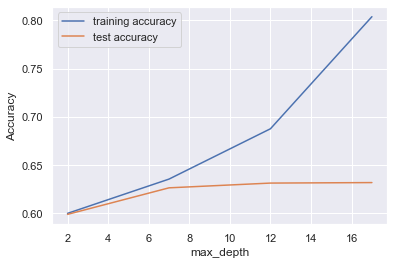

In [740]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The train set accuracy keeps on increasing which leads to an overfit but, for test set, accuracy drops after a specific point

 - `n_estimators` 
   The number of trees

In [741]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [742]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.548480,0.099169,0.174929,0.046408,100,{'n_estimators': 100},0.623175,0.614267,0.617379,0.612486,0.624169,0.618295,0.004672,4,0.624231,0.618481,0.622157,0.615093,0.624384,0.620869,0.003589
1,16.608455,0.157153,0.700681,0.056295,500,{'n_estimators': 500},0.622079,0.618502,0.617525,0.621979,0.620957,0.620208,0.001861,3,0.622880,0.623154,0.623964,0.621938,0.622522,0.622892,0.000673
2,29.056010,0.156461,1.204436,0.155553,900,{'n_estimators': 900},0.625073,0.618940,0.617087,0.622709,0.623731,0.621508,0.003008,2,0.623063,0.623245,0.623270,0.622449,0.622650,0.622935,0.000329
3,41.552135,0.228704,1.731598,0.083600,1300,{'n_estimators': 1300},0.623102,0.621130,0.618401,0.623074,0.622563,0.621654,0.001777,1,0.621566,0.623282,0.624074,0.622394,0.622960,0.622855,0.000843


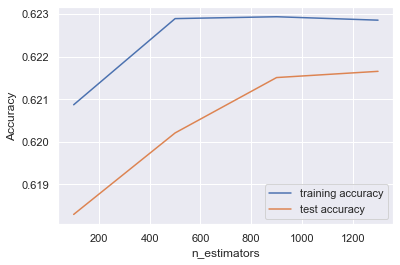

In [743]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 - `max_features` maximum numbre of features considered for splitting at a node.

In [744]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,30,36,40,45,50,60,64,72,90,100]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [745]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.949799,0.030606,0.146392,0.046601,4,{'max_features': 4},0.580680,0.581630,0.589339,0.605038,0.584155,0.588168,0.008954,15,0.583031,0.588434,0.588642,0.604633,0.585046,0.589957,0.007636
1,2.642732,0.087358,0.204282,0.036825,8,{'max_features': 8},0.615070,0.616968,0.607010,0.612486,0.616867,0.613680,0.003710,14,0.616126,0.619028,0.610584,0.614892,0.616717,0.615469,0.002788
2,3.907390,0.055414,0.151574,0.056348,14,{'max_features': 14},0.625438,0.619889,0.619058,0.623804,0.623804,0.622399,0.002476,5,0.624961,0.624286,0.625534,0.625680,0.623526,0.624797,0.000803
3,5.071631,0.112796,0.177730,0.036960,20,{'max_features': 20},0.626314,0.625949,0.621468,0.622125,0.623585,0.623888,0.001959,1,0.624742,0.626495,0.626155,0.624329,0.626410,0.625626,0.000907
4,5.902218,0.056919,0.134047,0.047553,24,{'max_features': 24},0.626606,0.623613,0.620080,0.624315,0.624535,0.623830,0.002124,2,0.625071,0.625637,0.624585,0.626720,0.625589,0.625520,0.000712


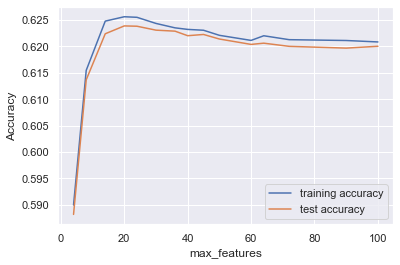

In [746]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 - `min_samples_leaf` minimum number of samples required to be at a leaf node

In [747]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [748]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.511012,0.119502,0.283659,0.043776,100,{'min_samples_leaf': 100},0.629235,0.627629,0.628039,0.630449,0.630230,0.629116,0.001132,1,0.637539,0.637758,0.637417,0.637399,0.638513,0.637725,0.000414
1,7.751454,0.113012,0.281235,0.039979,150,{'min_samples_leaf': 150},0.628286,0.625657,0.626944,0.628916,0.631836,0.628328,0.002084,2,0.634289,0.635111,0.634022,0.633420,0.633748,0.634118,0.000574
2,7.284857,0.084204,0.213645,0.018312,200,{'min_samples_leaf': 200},0.626095,0.625000,0.626798,0.628478,0.627674,0.626809,0.001210,3,0.630255,0.632592,0.632178,0.631813,0.631722,0.631712,0.000790
3,6.754783,0.117577,0.261706,0.036114,250,{'min_samples_leaf': 250},0.629454,0.625146,0.623512,0.626287,0.627893,0.626458,0.002072,4,0.630821,0.630620,0.630590,0.629805,0.630718,0.630511,0.000362
4,6.440045,0.073137,0.267285,0.049467,300,{'min_samples_leaf': 300},0.625803,0.623613,0.624973,0.626360,0.626287,0.625407,0.001024,6,0.628594,0.630456,0.629422,0.628728,0.629440,0.629328,0.000662


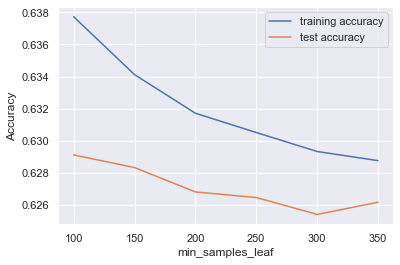

In [749]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 - `min_samples_split`

In [750]:
# GridSearchCV to find optimal min_sample_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [751]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.430525,0.197463,0.470152,0.096475,200,{'min_samples_split': 200},0.632374,0.632082,0.630084,0.635195,0.635487,0.633045,0.002036,1,0.675106,0.676457,0.673305,0.676043,0.674875,0.675157,0.001094
1,11.770128,0.247013,0.425276,0.055619,250,{'min_samples_split': 250},0.630695,0.632155,0.629865,0.633662,0.634465,0.632168,0.001731,2,0.665742,0.668060,0.666642,0.666807,0.665748,0.666600,0.000853
2,11.430379,0.182279,0.387790,0.078108,300,{'min_samples_split': 300},0.628505,0.633689,0.629354,0.633516,0.633151,0.631643,0.002239,4,0.660557,0.661233,0.661695,0.658592,0.660217,0.660459,0.001066
3,10.949889,0.318290,0.427519,0.045917,350,{'min_samples_split': 350},0.626971,0.632082,0.629281,0.630960,0.632275,0.630314,0.001981,5,0.655793,0.656761,0.655945,0.654357,0.656803,0.655932,0.000888
4,10.429647,0.180899,0.331698,0.073264,400,{'min_samples_split': 400},0.629600,0.629673,0.631471,0.633443,0.634903,0.631818,0.002088,3,0.654607,0.653055,0.653463,0.652879,0.653773,0.653555,0.000611


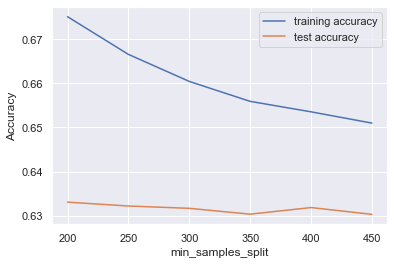

In [752]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


`Grid Search to Find Optimal Hyperparameters`

In [753]:
# Create the parameter grid based on the results of random search 
param_grid = {
     'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [754]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [755]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6281817468451184 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


`Fitting the final model with the best parameters obtained from grid search.`

In [756]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=300, 
                             min_samples_split=250,
                             max_features=20,
                             n_estimators=500)

In [757]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [758]:
# predict
predictions = rfc.predict(X_test)

In [759]:
print(confusion_matrix(y_test,predictions))

[[11542  3945]
 [ 7032  6829]]


In [760]:
# accuracy score
rfc.score(X_test,y_test)

0.6259711053564126

In [761]:
TP = confusion_matrix(y_test,predictions)[1,1] # true positive 
TN = confusion_matrix(y_test,predictions)[0,0] # true negatives
FP = confusion_matrix(y_test,predictions)[0,1] # false positives
FN = confusion_matrix(y_test,predictions)[1,0] # false negatives

In [762]:
#Check the Sensitivity/Recall
TP/float(TP+FN)

0.49267729601038884

In [763]:
#Check Specificity
TN/float(TN+FP)

0.7452702266416995

In [764]:
# Check False Positive Rate
FP/float(TN+FP)

0.2547297733583005

In [765]:
#Check Positive Predictive Value or Precision
TP/float(TP+FP)

0.6338407276777427

In [766]:
#Check Negative Predictive Value
TN/float(TN+FN)

0.6214062668245935

`ROC-AUC`

In [767]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

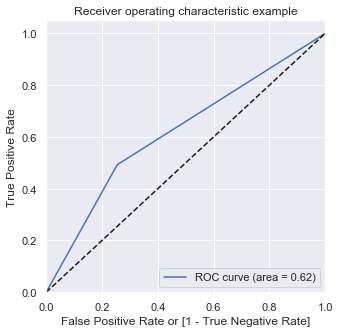

In [768]:
draw_roc( y_test, predictions)

In [769]:
important_feature = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [770]:
important_feature = pd.DataFrame(important_feature.reset_index())

In [771]:
important_feature.rename(columns={'index':'features'},inplace = True)

In [772]:
important_feature.head()

,features,importance
0,number_inpatient,0.443490
1,number_emergency,0.102944
2,number_diagnoses,0.089658
3,number_outpatient,0.076241
4,num_medications,0.044848


In [773]:
important_feature_1 = important_feature.sort_values('importance',ascending=True) # this is for the bar graph
important_feature_1 = important_feature_1[important_feature_1['importance']>0.0]

Text(0.5, 1.0, 'Feature Importance')

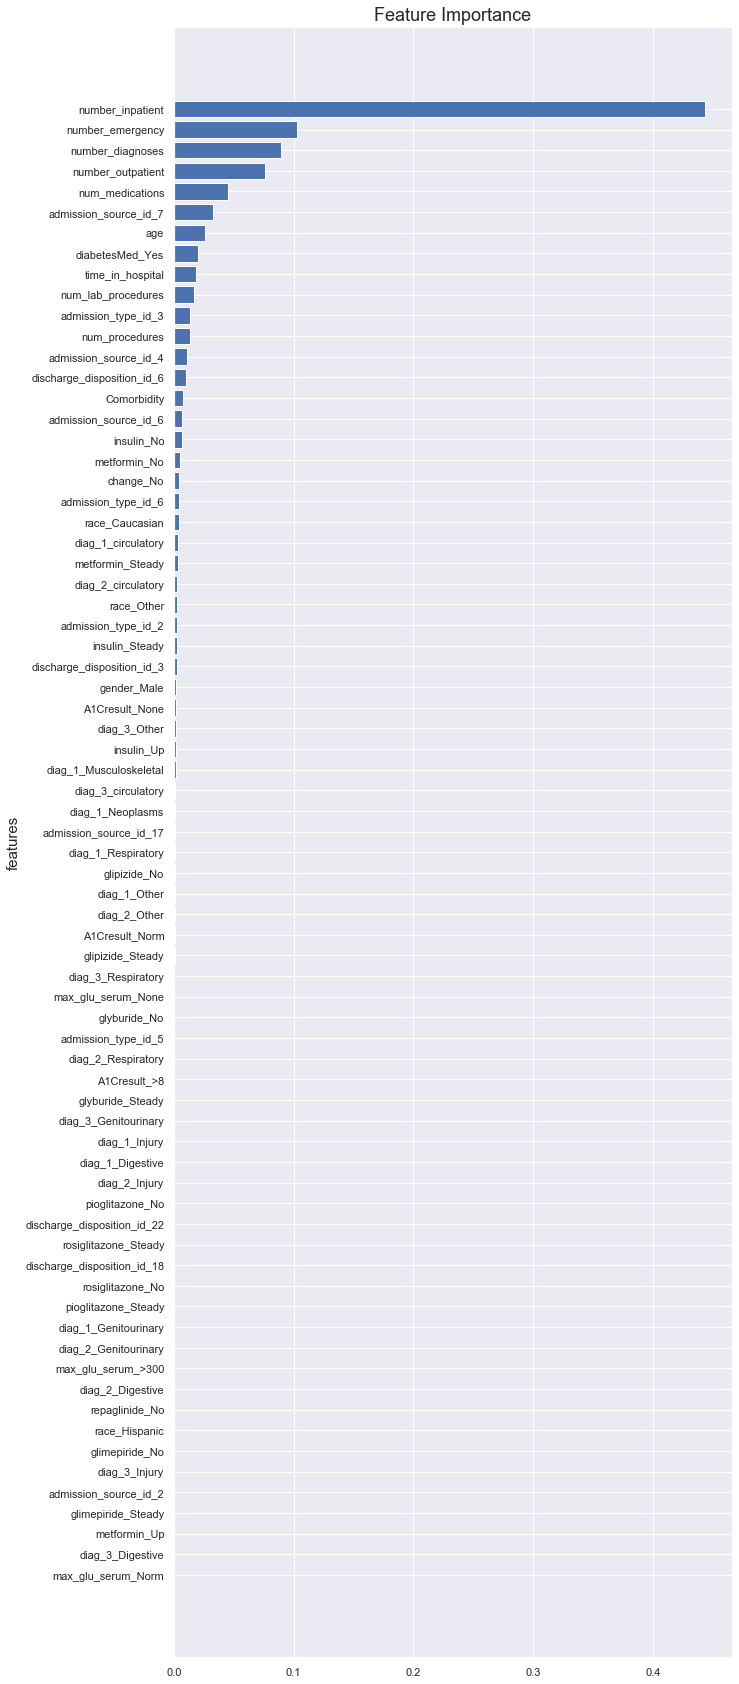

In [774]:
plt.figure(figsize=(10,30))
# bar plot with matplotlib
plt.barh('features', 'importance',data=important_feature_1)
plt.ylabel("features", size=15)
plt.title("Feature Importance", size=18)

### 7. Final Model Selection

We can see that both the model are producing almost similar Accuracy score.Around 61.5% (Logistic regression) and 63% (Random Forest) respectively.

But Accuracy gives equal importance to both false positives and false negatives and cannot differentiate between them. Hence, let us chcek other significant metrics as Accuracy might not be a good metric for a measure for classification problems.

If we look into the definition of `Precision or positive predictive value`, it is TP/(TP+FP).In another word it is the accuracy of the prediction. It provides the proportion of true positives out of predicted positives. Precision Score is 63.4% for Logistic Regression but for Random Forest it is only around 48%.

Again, if we look into another important metric named Sensitivity; it is TP/(TP+FN).In another word, Sensitivity is the true positive rate and out of all the actual '1' labels, how many were correctly predicted. Sensitivity Score is around 44% for Logistic Regression where as for Random Forest model it is 41%.

Hence, looking into Precision and Sensitivity, let us consider Logistic Regression as the final model to continue with




### 8. Final Outcome

In [775]:
# Now, let us go back to  output of Logistic Regression 
y_pred_final.head()

,readmitted,Readmission_Prob,final_predicted
0,0,0.416012,0
1,0,0.416012,0
2,0,0.739420,1
3,0,0.416012,0
4,1,0.416012,0


In [776]:
#Get the patient Ids
k = k.reset_index()

In [777]:
k.drop('index',axis=1,inplace = True)

In [778]:
k.head()

,patient_nbr
0,88599186
1,43281387
2,82385703
3,34319277
4,80758494


In [779]:
#Get the Patient Id along with the dataset
final_df = pd.concat([k,y_pred_final],axis=1)

In [780]:
final_df.head()

,patient_nbr,readmitted,Readmission_Prob,final_predicted
0,88599186,0,0.416012,0
1,43281387,0,0.416012,0
2,82385703,0,0.739420,1
3,34319277,0,0.416012,0
4,80758494,1,0.416012,0


In [781]:
# Define the Risk Buckets
final_df['risk_buckets'] = final_df['Readmission_Prob'].apply(lambda x: 'High risk' if x>=0.7 else ('Medium risk' if x>=0.3 and x<0.7 else 'Low risk'))

In [782]:
final_df = final_df[['patient_nbr','Readmission_Prob','risk_buckets']]
final_df.head(20)

,patient_nbr,Readmission_Prob,risk_buckets
0,88599186,0.416012,Medium risk
1,43281387,0.416012,Medium risk
2,82385703,0.739420,High risk
3,34319277,0.416012,Medium risk
4,80758494,0.416012,Medium risk
5,91647855,0.416012,Medium risk
6,28070820,0.416012,Medium risk
7,947934,0.530348,Medium risk
8,109863612,0.818120,High risk
9,112108122,0.530348,Medium risk
